In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


In [231]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
PATH='drive/MyDrive/enpm808w-datasets/housing_prices/'

Mounted at /content/drive/


In [232]:
train_df =pd.read_csv(PATH + 'house_train.csv')
test_df=pd.read_csv(PATH + 'house_test.csv')
train_df.head()

,id,zip,state,county,poverty,price2007,price2013
0,0,10467,NY,bronx,27.1,335200,294000
1,1,11226,NY,kings,21.9,471500,471600
2,2,60640,IL,cook,14.6,254600,174200
3,3,94109,CA,san francisco,10.6,707100,822600
4,4,11375,NY,queens,12.2,636400,681500


In [233]:
# train_df['state'].unique()
# sns.pairplot(train_df)

In [234]:
test_df.head()

,id,zip,state,county,poverty,price2007
0,6,32162,FL,marion,13.0,265600
1,13,78572,TX,hidalgo,34.0,79900
2,20,11212,NY,kings,21.9,332000
3,30,37042,TN,montgomery,12.7,98700
4,37,85032,AZ,maricopa,12.9,266100


In [235]:
train_df.shape

# train_df.shape

(8973, 7)

In [236]:
test_df.shape

(1063, 6)

In [237]:
for tt in [train_df, test_df]:
  (tt.info())
# train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         8973 non-null   int64  
 1   zip        8973 non-null   int64  
 2   state      8973 non-null   object 
 3   county     8973 non-null   object 
 4   poverty    8973 non-null   float64
 5   price2007  8973 non-null   int64  
 6   price2013  8973 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1063 non-null   int64  
 1   zip        1063 non-null   int64  
 2   state      1063 non-null   object 
 3   county     1063 non-null   object 
 4   poverty    1063 non-null   float64
 5   price2007  1063 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memo

no null values present

getting all statistical data

In [238]:
train_df.describe() 

,id,zip,poverty,price2007,price2013
count,8973.000000,8973.000000,8973.000000,8.973000e+03,8.973000e+03
mean,5016.424830,45752.551098,11.438504,2.880939e+05,2.424867e+05
std,2900.023449,31306.650907,4.520784,2.276980e+05,2.176485e+05
min,0.000000,1001.000000,-1.000000,3.400000e+04,3.520000e+04
25%,2505.000000,19026.000000,8.400000,1.397000e+05,1.223000e+05
50%,5023.000000,37324.000000,11.100000,2.230000e+05,1.788000e+05
75%,7528.000000,76085.000000,14.500000,3.627000e+05,2.848000e+05
max,10035.000000,99709.000000,34.000000,3.467800e+06,4.709500e+06


In [239]:
test_df.describe()

,id,zip,poverty,price2007
count,1063.000000,1063.000000,1063.000000,1.063000e+03
mean,5026.575729,45231.877705,11.204798,2.907117e+05
std,2875.433022,31880.881738,4.388406,2.308495e+05
min,6.000000,1002.000000,-1.000000,4.020000e+04
25%,2544.500000,18097.000000,8.300000,1.426500e+05
50%,4953.000000,36582.000000,11.000000,2.302000e+05
75%,7516.500000,75907.000000,14.200000,3.675000e+05
max,10029.000000,99712.000000,34.000000,2.569700e+06


**Task 2:**
To divide data into independent variable and dependent variable since we are using only state information only: state information would include the zip code only for each state since the state column is a string
  x = zip, y = price2013

In [326]:
x = train_df.drop(['id','zip','county','poverty','price2007','price2013'],axis=1)
x=pd.get_dummies(data=x, drop_first=True)

y = train_df['price2013']


In [327]:
print(x.shape)
print(y.shape)
x

(8973, 45)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
# # x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80, test_size=0.2, random_state=100)
# x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)
# # sns.scatterplot(x='state', y='price2013')


In [282]:
state_lr=LinearRegression()
state_info_lr = state_lr.fit(x,y) 


**Task 2A**
What is the intercept? What does it correspond to? 


In [283]:
# lr.intercept_
print('the Intercept is', state_lr.intercept_)

the Intercept is 281729.99999999965


The intercept corresponds to the overall mean value in relation to the state values being equal to zero

In [284]:
# lr.coef_
print('the state coefficients are \n', state_lr.coef_)


the state coefficients are 
 [-1.40892637e+05 -1.59320411e+05 -7.47779798e+04  2.30872896e+05
 -3.31445455e+04  6.70160377e+03  2.32558889e+05 -7.44633333e+04
 -1.06742121e+05 -1.39333721e+05  1.98581364e+05 -1.28573210e+05
 -1.06567771e+05 -1.46506471e+05 -1.43630000e+05 -1.35713333e+05
 -1.44257273e+05  5.77500000e+04  1.15519713e+02 -1.38182030e+05
 -7.54763277e+04 -1.27859197e+05 -5.57347619e+04 -1.32108019e+05
 -1.24863333e+05 -1.42711481e+05 -7.92850562e+04  2.47604645e+04
 -9.23758333e+04 -6.66660656e+04  1.70166176e+04 -1.64368283e+05
 -1.71825238e+05 -6.68951685e+04 -1.13104332e+05 -5.86692157e+04
 -1.35617786e+05 -1.50723089e+05 -1.21074828e+05 -4.37300000e+04
  1.83131280e+04 -1.52661217e+04 -1.18829479e+05 -1.83306923e+05
 -8.72500000e+04]


**Task 2B**
How do you get this information from your regression?

Using the Formula for Linear Regression
**Y=B0+B1X1**

where Y is the prediction/dependent variable 
B0 is the y-intercept, 
B1 is the coefficient/slope
X1 is the independent variable

In [303]:
coeff_df = pd.DataFrame(state_lr.coef_,x.columns,columns=['Coefficients'])
coeff_df['states']=x.columns.str.replace('state_','')
coeff_df


,Coefficients,states
state_AL,-140892.637363,AL
state_AR,-159320.410959,AR
state_AZ,-74777.979798,AZ
state_CA,230872.895553,CA
state_CO,-33144.545455,CO
state_CT,6701.603774,CT
state_DC,232558.888889,DC
state_DE,-74463.333333,DE
state_FL,-106742.121212,FL
state_GA,-139333.720930,GA


**Task 2C**
Based on your regression coefficients, what states have the most and least 
expensive average homes?

In [306]:
# coeff_df.sort_values(by='Coefficients',ascending=False)
print('the state that have the most expensive average homes', coeff_df.max())
print('the state that have the least expensive average homes', coeff_df.min())


the state that have the most expensive average homes Coefficients    232558.888889
states                     WY
dtype: object
the state that have the least expensive average homes Coefficients   -183306.923077
states                     AL
dtype: object


In [287]:
# coeff_df.value_counts()

In [ ]:

# regression_line =[state_lr.coef_*x + state_lr.intercept_ for x in x ]
# regression_line
# # plt.plot(x,regression_line)
# # plt.show()

In [250]:
# train_df.mean()
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='state', y=train_df['price2013'].mean(), data=train_df)
# price_mean= train_df['price2013'].mean()
print(train_df['price2013'].value_counts())


125300    12
118100    12
111500    10
114900    10
132800    10
          ..
516600     1
607500     1
50800      1
460200     1
181700     1
Name: price2013, Length: 3924, dtype: int64


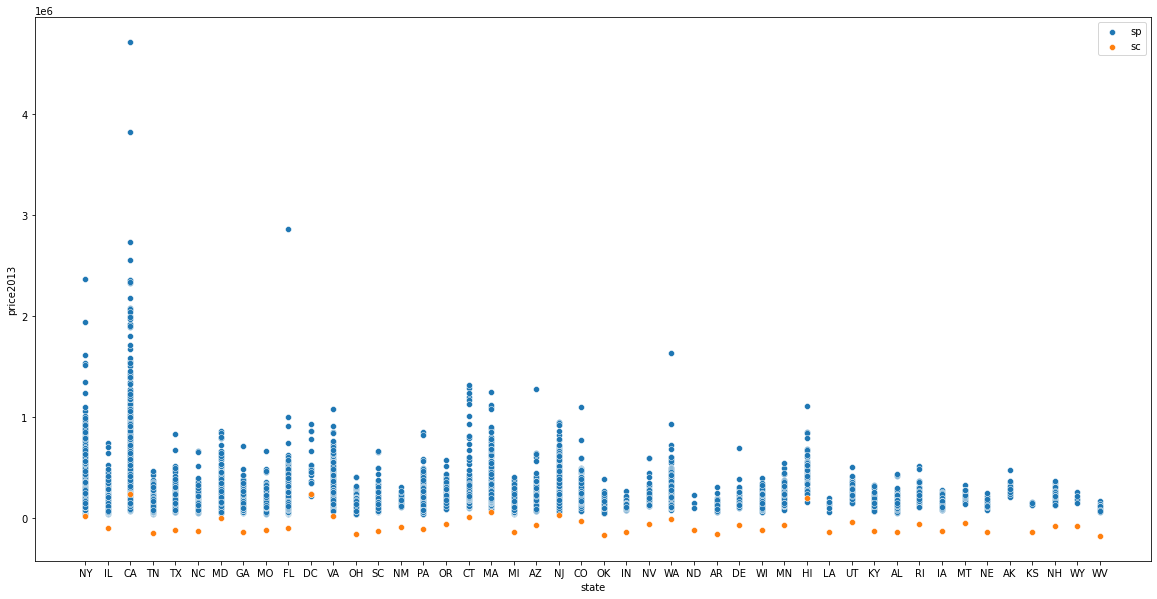

In [251]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(x=train_df['zip'], y=train_df['price2013'])
# sns.barplot(x=x,y='price2013', hue='lr')
# ax=train_df.plot(x='state', y='price2013')
# coeff_df.plot(ax=ax, x='states', y='Coefficients')
# df = pd.concat([train_df,coeff_df]).reset_index(drop=True)
# sns.relplot(data=df, x='price2013',y='Coefficients', hue='states')
fig, ax=plt.subplots(figsize=(20,10))
sns.scatterplot(data=train_df, x='state',y='price2013',label='sp',ax=ax)
sns.scatterplot(data=coeff_df, x='states',y='Coefficients',label='sc',ax=ax)

In [307]:
s_pred = state_lr.predict(x)
s_pred


array([298746.61764706, 298746.61764706, 175162.22910217, ...,
       238000.        , 339480.        , 281845.51971326])

In [332]:
x_test = test_df.drop(['id','zip','county','poverty','price2007'],axis=1)
x_tes=pd.get_dummies(data=x, drop_first=True)

y = test_df['price2007']


In [333]:
print(x.shape)
print(y.shape)
x

(1063, 43)
(1063,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_OR,state_PA,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
# x_test=pd.get_dummies(data=test_df,drop_first=True)
# x_test=state_lr.predict(x_test)

In [253]:
# x_test = test_df.drop(['id','zip','county','poverty','price2007'],axis=1)
# x_test=pd.get_dummies(data=x_test,drop_first=True)
# y_test=test_df['price2007']

In [254]:
# print(x_test.shape)
# print(y_test.shape)
# x_test

In [255]:
# x_test=pd.get_dummies(data=test_df,drop_first=True)

In [256]:
# test_df1.dropna(0)


In [257]:
# s_pred_test = state_lr.predict(x_test)
# s_pred_test

In [258]:
state_lr.score(x,y)


0.28677815383945593

In [259]:
# print('RMSE Score is :', rmse(test_df,s_pred_test))

In [260]:
df_pred_s=pd.DataFrame(s_pred, columns=['State Predictions'])
df_pred_s

,State Predictions
0,298746.617647
1,298746.617647
2,175162.229102
3,512602.895553
4,298746.617647
...,...
8968,146112.213740
8969,512602.895553
8970,238000.000000
8971,339480.000000


**Task 2D**
How do you get this information from your regression?

by checking for the maximum and minimum values of the regression coefficients 

**Task 2E**
 What is the average price of homes in those states?

In [261]:
# avg_price = lr.coef_+lr.intercept_
avg_price_df= pd.DataFrame(state_lr.coef_+state_lr.intercept_,x.columns,columns=['Average Price of Homes'])\
.sort_values(by='Average Price of Homes', ascending=False)
avg_price_df

,Average Price of Homes
state_DC,514288.888889
state_CA,512602.895553
state_HI,480311.363636
state_MA,339480.000000
state_NJ,306490.464548
state_VA,300043.127962
state_NY,298746.617647
state_CT,288431.603774
state_MD,281845.519713
state_WA,266463.878327


**Task 2F**
How do you get this information from your regression?

the coefficients and the intercept define the linear relationship between the two variables and can be estimated as an averate rate of change. so the greater the coefficient, the higher the rate of change. As the average price for each state increases, so does the price of each state

**Task 3**
 Predict 2013 home prices from state and county information.
 
**A.** What US counties have the highest and lowest regression coefficients? 
Why?


In [275]:
X = train_df.drop(['id','zip','poverty','price2007','price2013'],axis=1)
X=pd.get_dummies(data=X, drop_first=True)
y = train_df['price2013']

In [263]:
print(X.shape)
print(y.shape)
X

(8973, 672)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,county_yadkin,county_yakima,county_yamhill,county_yates,county_yavapai,county_yellowstone,county_yolo,county_york,county_yuba,county_yuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
# # X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80, test_size=0.2, random_state=100)
# X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [265]:
sc_lr=LinearRegression()
state_cty_info_lr=sc_lr.fit(X,y)

In [266]:
# sc_lr.coef_
print('State and County coefficients are \n', sc_lr.coef_)

State and County coefficients are 
 [ 1.33001020e+16  1.33001020e+16  1.33001020e+16  1.33001020e+16
  1.33001020e+16  1.33001020e+16  4.84754216e+17  1.33001020e+16
  1.33001020e+16  1.33001020e+16  2.21848433e+17  1.33001020e+16
  1.33001020e+16  1.33001020e+16  1.33001020e+16  1.33001020e+16
  7.06495136e+17  1.33001020e+16  1.33001020e+16  1.33001020e+16
  1.33001020e+16  1.33001020e+16  5.65828063e+17  1.33001020e+16
 -2.57112469e+16  1.33001020e+16  1.33001020e+16  1.33001020e+16
  5.30004914e+16  1.33001020e+16  1.33001020e+16  1.33001020e+16
  1.33001020e+16  1.33001020e+16  1.33001020e+16  1.33001020e+16
  1.33001020e+16  1.33001020e+16  1.33001020e+16  1.33001020e+16
  1.33001020e+16  1.33001020e+16  1.33001020e+16  1.33001020e+16
  5.63209247e+16  2.34340000e+04  5.24830000e+04  6.38290000e+04
  1.66058000e+05  4.63520000e+04  1.44507000e+05  3.39549000e+05
  3.30220000e+04 -1.62161250e+05  1.51760000e+04  5.04370000e+04
 -2.32624625e+05  1.33001020e+16  2.51670000e+04  1.09

In [267]:
county_coeff_df = pd.DataFrame(sc_lr.coef_,X.columns,columns=['Coefficients'])
# df=pd.concat([coeff_df,county_coeff_df],axis=1)
# df=coeff_df.append(county_coeff_df)
county_coeff_df['states']=X.columns.str.replace('state_','')
county_coeff_df['Counties']=X.columns.str.replace('county_','')
# county_coeff_df
county_coeff_df
# df.describe()
# df


,Coefficients,states,Counties
state_AL,1.330010e+16,AL,state_AL
state_AR,1.330010e+16,AR,state_AR
state_AZ,1.330010e+16,AZ,state_AZ
state_CA,1.330010e+16,CA,state_CA
state_CO,1.330010e+16,CO,state_CO
...,...,...,...
county_yellowstone,-5.525280e+17,county_yellowstone,yellowstone
county_yolo,-9.690725e+04,county_yolo,yolo
county_york,6.116000e+04,county_york,york
county_yuba,-2.575742e+05,county_yuba,yuba


In [268]:
print('the state that have the most expensive average homes', county_coeff_df.max())
print('the state that have the least expensive average homes', county_coeff_df.min())

the state that have the most expensive average homes Coefficients    706495136000307456.0
states                   county_yuma
Counties                        yuma
dtype: object
the state that have the least expensive average homes Coefficients   -693195034023041408.0
states                            AL
Counties                       aiken
dtype: object


In [281]:
sc_pred=sc_lr.predict(X)
sc_pred  
sc_pred_df=pd.DataFrame(sc_pred, columns=['State & County Predictions'])
sc_pred_df

,State & County Predictions
0,381114.0
1,429258.0
2,220446.0
3,1026342.0
4,522818.0
...,...
8968,275666.0
8969,321458.0
8970,206910.0
8971,303724.0


In [270]:
sc_lr.score(X,y)

0.5482902307091879

In [271]:
# X.isnull().sum()

In [323]:
X_test_df=pd.get_dummies(data=test_df)
X_test_df

,id,zip,poverty,price2007,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,...,county_wood,county_worcester,county_wright,county_yadkin,county_yakima,county_yamhill,county_yavapai,county_yellowstone,county_york,county_yuba
0,6,32162,13.0,265600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,78572,34.0,79900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,11212,21.9,332000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,37042,12.7,98700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,85032,12.9,266100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,9972,6282,8.5,242000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,9991,60512,3.7,233400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060,9993,21912,9.3,336600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,9996,21662,8.3,772300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
# sc_pred_test = sc_lr.predict(test_df)
# sc_pred_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- county
- id
- poverty
- price2007
- state
- ...
Feature names seen at fit time, yet now missing:
- county_aiken
- county_alachua
- county_alamance
- county_alameda
- county_albany
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
# print('RMSE Score:')
# print(rmse(test_df,sc_pred_test))


In [277]:
sc_s_pred=pd.concat([df_pred_s,sc_pred_df],axis=1)
sc_s_pred

,State Predictions,State & County Predictions
0,298746.617647,381114.0
1,298746.617647,429258.0
2,175162.229102,220446.0
3,512602.895553,1026342.0
4,298746.617647,522818.0
...,...,...
8968,146112.213740,275666.0
8969,512602.895553,321458.0
8970,238000.000000,206910.0
8971,339480.000000,303724.0


In [278]:

from xgboost import XGBRegressor
model= XGBRegressor(n_estimators=350, max_depth=15,learning_rate=.1,random_state=1,\
                    n_jobs=10,subsample=1,min_child_weight=0.6)
model.fit(X,y)
preds_test=model.predict(test_df)

[21:52:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: ignored

In [ ]:
# preds_test
print('RMSE Score:')
print(rmse(test_df,preds_test))

In [ ]:
test_df1 = pd.get_dummies(test_df)
X, test_df = X.align(test_df1, join='left', axis=1)
test_df1.head()

In [ ]:
preds_test=model.predict(test_df)
print(len(preds_test))

In [ ]:
plt.hist(preds_test,bins=80)
plt.title('Predicted House Price')


In [ ]:
output = pd.DataFrame({'id':test_df1.id,
                       'HousePrice': preds_test})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")